In [1]:
import pandas as pd
import geopandas as gpd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt


In [2]:
main_gdf = gpd.read_file('Demographics_of_India.dbf')

In [3]:
jan = pd.read_csv('Weekly processed NO2/January/NO2__FROM_2020-01-01_TO_2020-01-07.csv')

In [4]:
feb = pd.read_csv('Weekly processed NO2/February/NO2__FROM_2020-02-01_TO_2020-02-07.csv')

In [6]:
feb

,latitude,longitude,mean_tropospheric_NO2_column_number_density,min_tropospheric_NO2_column_number_density,max_tropospheric_NO2_column_number_density
0,8.45,68.75,4.313203e+18,1.277760e+18,7.595604e+18
1,8.45,68.85,4.591012e+18,2.491251e+18,7.694794e+18
2,8.45,68.95,4.639145e+18,1.523059e+18,6.602229e+18
3,8.45,69.05,4.748074e+18,1.531338e+18,8.775139e+18
4,8.45,69.15,4.990715e+18,2.502331e+18,8.494508e+18
...,...,...,...,...,...
82639,37.45,96.65,4.121799e+18,-5.586884e+16,8.055433e+18
82640,37.45,96.75,4.386607e+18,9.660698e+17,7.154139e+18
82641,37.45,96.85,4.959283e+18,1.301631e+18,8.380740e+18
82642,37.45,96.95,5.224059e+18,1.199975e+18,1.080755e+19


In [58]:
jan.quantile(0.999)
# jan.describe()

latitude                                       3.745000e+01
longitude                                      9.705000e+01
mean_tropospheric_NO2_column_number_density    1.008679e+20
min_tropospheric_NO2_column_number_density     4.730544e+19
max_tropospheric_NO2_column_number_density     2.356434e+20
Name: 0.999, dtype: float64

In [69]:
jan_initial_hotspots = jan[jan['mean_tropospheric_NO2_column_number_density'] > 1.008679e+20 ]
feb_initial_hotspots = feb[feb['mean_tropospheric_NO2_column_number_density'] > 1.008679e+20 ]

In [70]:
jan_initial_hotspots.describe()

,latitude,longitude,mean_tropospheric_NO2_column_number_density,min_tropospheric_NO2_column_number_density,max_tropospheric_NO2_column_number_density
count,83.000000,83.000000,8.300000e+01,8.300000e+01,8.300000e+01
mean,26.907831,78.845181,1.355377e+20,4.746419e+19,2.748343e+20
std,3.352797,3.725420,3.484068e+19,2.859405e+19,1.127498e+20
min,20.850000,73.050000,1.009493e+20,-3.614074e+18,1.261757e+20
25%,23.050000,76.750000,1.088185e+20,2.963072e+19,1.989187e+20
50%,28.550000,77.250000,1.257880e+20,4.009863e+19,2.387849e+20
75%,28.750000,82.550000,1.527687e+20,6.229383e+19,3.145241e+20
max,33.550000,90.550000,2.645792e+20,1.179888e+20,6.214911e+20


In [71]:
# jan_final_hotspots = jan_initial_hotspots[jan_initial_hotspots['mean_SO2_column_number_density'] > 3.915357e+21 ]

In [72]:
# jan_final_hotspots.describe()

In [73]:
jan_final_hotspots = jan_initial_hotspots

In [74]:
geometry = [Point(xy) for xy in zip(jan_final_hotspots.longitude, jan_final_hotspots.latitude)]
crs = {'init': 'epsg:4326'}
jan_final_hotspots_gdf = GeoDataFrame(jan_final_hotspots, crs=crs, geometry=geometry)

geometry = [Point(xy) for xy in zip(feb_initial_hotspots.longitude, feb_initial_hotspots.latitude)]
crs = {'init': 'epsg:4326'}
feb_final_hotspots_gdf = GeoDataFrame(feb_initial_hotspots, crs=crs, geometry=geometry)

/home/stark/miniconda3/envs/pysal/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

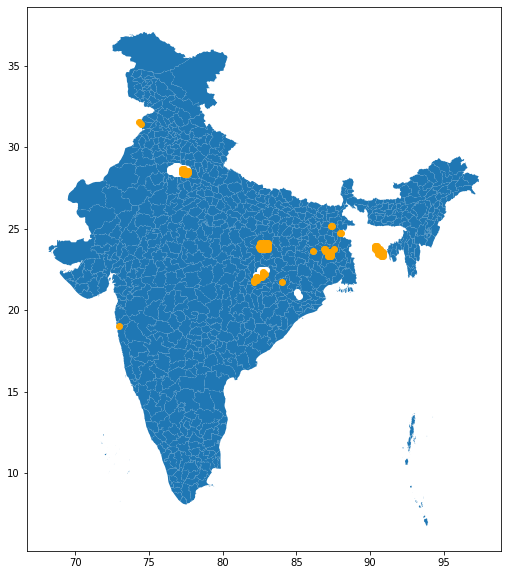

In [75]:
base_map = main_gdf.plot(figsize=(15, 10))
jan_final_hotspots_gdf.plot(ax=base_map, color='white')
feb_final_hotspots_gdf.plot(ax=base_map, color='orange')

In [76]:
feb_initial_hotspots.describe()

,latitude,longitude,mean_tropospheric_NO2_column_number_density,min_tropospheric_NO2_column_number_density,max_tropospheric_NO2_column_number_density
count,103.000000,103.000000,1.030000e+02,1.030000e+02,1.030000e+02
mean,24.364563,84.121845,1.376961e+20,5.550133e+19,2.398273e+20
std,2.198636,4.618302,3.621147e+19,2.771978e+19,6.134269e+19
min,19.050000,72.950000,1.020957e+20,1.350162e+19,1.398469e+20
25%,23.450000,82.400000,1.113757e+20,3.765601e+19,1.936636e+20
50%,23.750000,82.850000,1.251476e+20,5.286554e+19,2.213816e+20
75%,24.150000,87.400000,1.514299e+20,6.974617e+19,2.784650e+20
max,31.550000,90.850000,2.893985e+20,2.022079e+20,4.874555e+20


In [77]:
feb.quantile(0.999)

latitude                                       3.745000e+01
longitude                                      9.705000e+01
mean_tropospheric_NO2_column_number_density    1.092293e+20
min_tropospheric_NO2_column_number_density     5.045168e+19
max_tropospheric_NO2_column_number_density     2.100593e+20
Name: 0.999, dtype: float64

In [78]:
feb_cors = feb[feb.latitude.isin(jan_final_hotspots['latitude']) & feb.longitude.isin(jan_final_hotspots['longitude'])]

In [79]:
feb_cors.describe()

,latitude,longitude,mean_tropospheric_NO2_column_number_density,min_tropospheric_NO2_column_number_density,max_tropospheric_NO2_column_number_density
count,713.000000,713.000000,7.130000e+02,7.130000e+02,7.130000e+02
mean,26.423913,79.146774,2.735111e+19,1.423855e+19,4.598875e+19
std,4.128133,4.649278,3.366542e+19,1.469245e+19,5.996075e+19
min,20.850000,73.050000,6.545423e+17,-4.162857e+18,2.207035e+18
25%,22.250000,76.450000,1.040902e+19,5.162023e+18,1.499743e+19
50%,28.350000,77.250000,1.463377e+19,1.000984e+19,2.206504e+19
75%,31.050000,82.650000,2.962993e+19,1.659549e+19,4.510977e+19
max,33.550000,90.550000,2.893985e+20,1.086052e+20,4.874555e+20


In [80]:
feb_cors = feb_cors[feb_cors > 1.008679e+20]

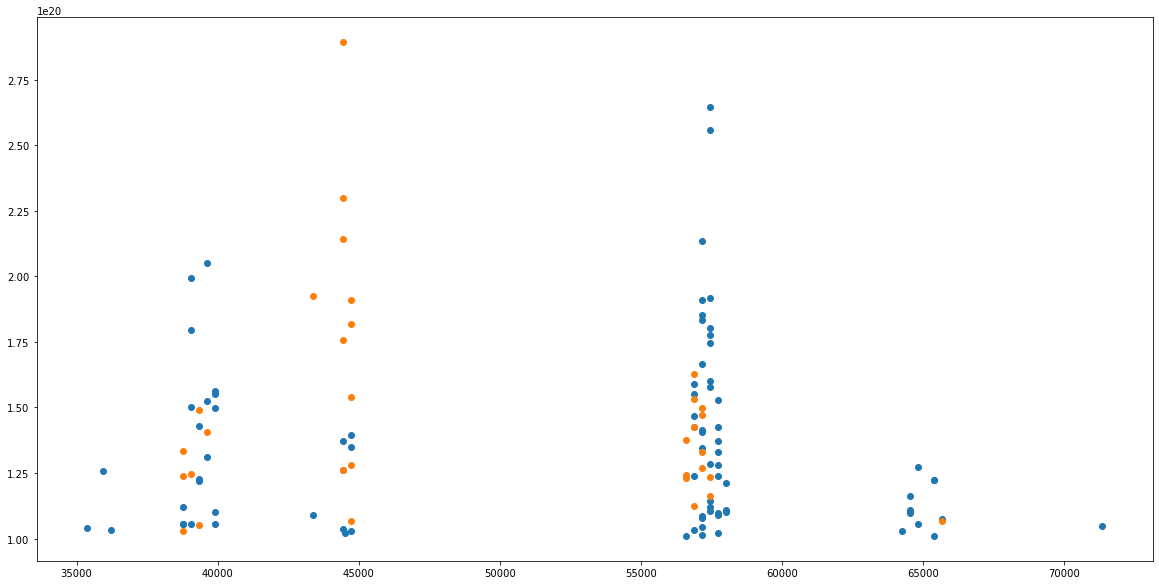

In [81]:
plt.figure(figsize=(20,10))
plt.plot(jan_final_hotspots['mean_tropospheric_NO2_column_number_density'], marker='o', linestyle="None")
plt.plot(feb_cors['mean_tropospheric_NO2_column_number_density'], marker='o', linestyle="None")

In [82]:
feb_cors = feb_initial_hotspots[feb_initial_hotspots.latitude.isin(jan_final_hotspots['latitude']) & feb_initial_hotspots.longitude.isin(jan_final_hotspots['longitude'])]

In [ ]:
feb.isna().sum()

In [86]:
jan_hotspots = jan_initial_hotspots

In [87]:
feb_same_location = feb[feb.latitude.isin(jan_final_hotspots['latitude']) & feb.longitude.isin(jan_final_hotspots['longitude'])]

In [88]:
jan_and_feb_hostspot = feb_same_location[feb_same_location['mean_tropospheric_NO2_column_number_density'] > 1.008679e+20]

In [89]:
jan_not_feb_hostspot = feb_same_location[feb_same_location['mean_tropospheric_NO2_column_number_density'] <= 1.008679e+20]

In [90]:
feb_hotspots = feb[feb['mean_tropospheric_NO2_column_number_density'] > 1.008679e+20]

In [91]:
feb_not_jan_hotspots = jan[jan.latitude.isin(feb_hotspots['latitude']) & jan.longitude.isin(feb_hotspots['longitude'])]

/home/stark/miniconda3/envs/pysal/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

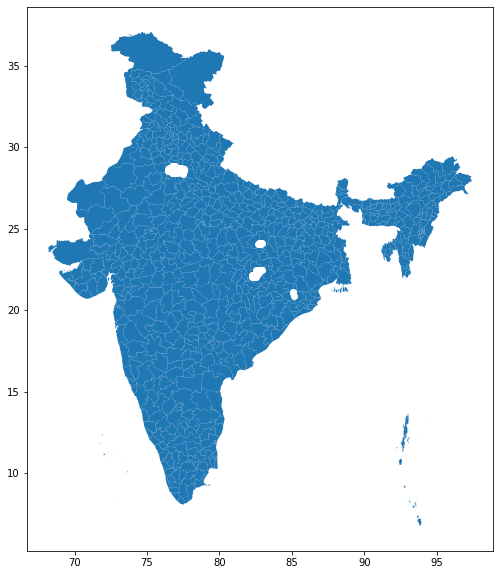

In [99]:
geometry = [Point(xy) for xy in zip(jan_hotspots.longitude, jan_hotspots.latitude)]
crs = {'init': 'epsg:4326'}
jan_hotspots_gdf = GeoDataFrame(jan_hotspots, crs=crs, geometry=geometry)

plt.figure()
base_map = main_gdf.plot(figsize=(15, 10))
jan_hotspots_gdf.plot(ax=base_map, color='white')


/home/stark/miniconda3/envs/pysal/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

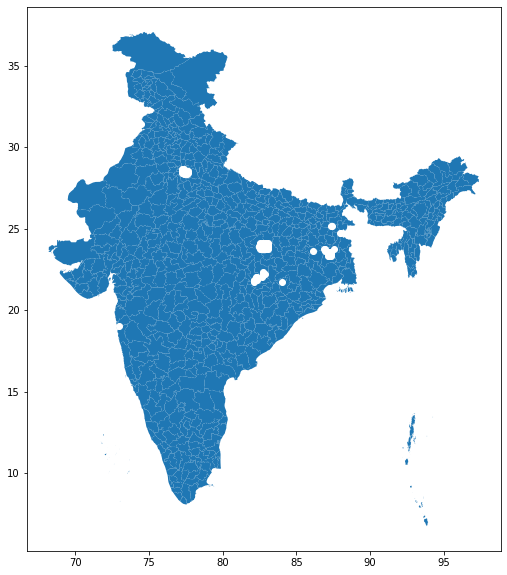

In [93]:
geometry = [Point(xy) for xy in zip(feb_hotspots.longitude, feb_hotspots.latitude)]
crs = {'init': 'epsg:4326'}
feb_hotspots_gdf = GeoDataFrame(feb_hotspots, crs=crs, geometry=geometry)

base_map = main_gdf.plot(figsize=(15, 10))
feb_hotspots_gdf.plot(ax=base_map, color='white')


<AxesSubplot:>

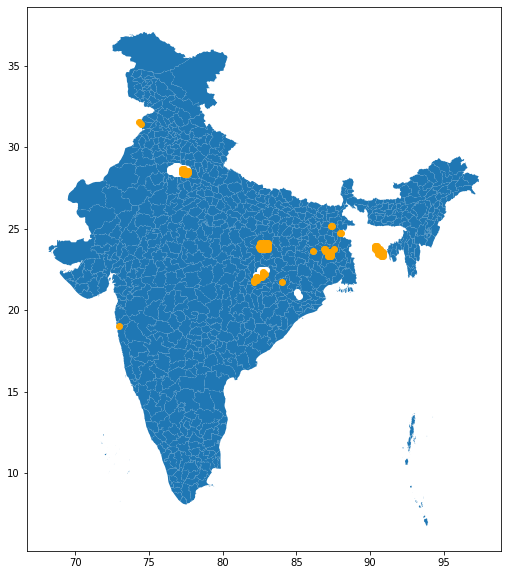

In [94]:
base_map = main_gdf.plot(figsize=(15, 10))
jan_hotspots_gdf.plot(ax=base_map, color='white')
feb_hotspots_gdf.plot(ax=base_map, color='orange')


/home/stark/miniconda3/envs/pysal/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

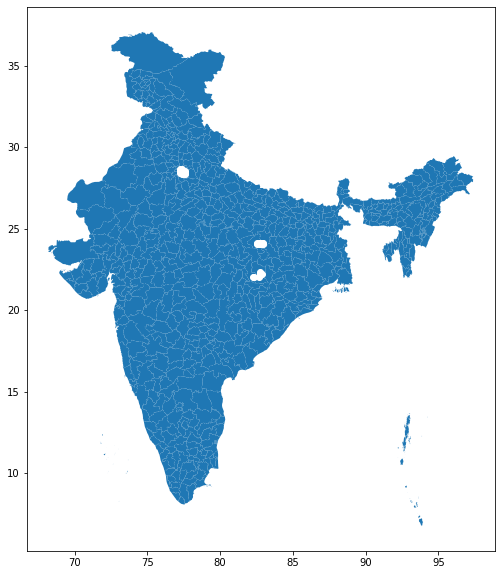

In [95]:
geometry = [Point(xy) for xy in zip(jan_and_feb_hostspot.longitude, jan_and_feb_hostspot.latitude)]
crs = {'init': 'epsg:4326'}
jan_and_feb_hostspot_gdf = GeoDataFrame(jan_and_feb_hostspot, crs=crs, geometry=geometry)

base_map = main_gdf.plot(figsize=(15, 10))
jan_and_feb_hostspot_gdf.plot(ax=base_map, color='white')


In [97]:
# geometry = [Point(xy) for xy in zip(jan_not_feb_hostspot.longitude, jan_not_feb_hostspot.latitude)]
# crs = {'init': 'epsg:4326'}
# jan_not_feb_hostspot_gdf = GeoDataFrame(jan_not_feb_hostspot, crs=crs, geometry=geometry)

# base_map = main_gdf.plot(figsize=(15, 10))
# jan_not_feb_hostspot_gdf.plot(ax=base_map, color='white')


In [98]:
# jan_final_hotspots_gdf.plot(ax=base_map, color='white')
# feb_final_hotspots_gdf.plot(ax=base_map, color='orange')

In [ ]:


geometry = [Point(xy) for xy in zip(feb_initial_hotspots.longitude, feb_initial_hotspots.latitude)]
crs = {'init': 'epsg:4326'}
feb_final_hotspots_gdf = GeoDataFrame(feb_initial_hotspots, crs=crs, geometry=geometry)